# **Segmentación por umbralización**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise


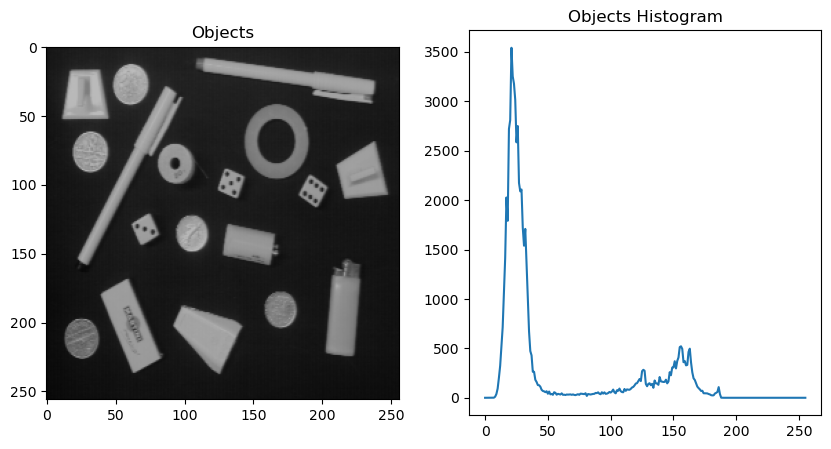

In [7]:
#Lectura de la imagen y calculo del histograma
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)
objectsHistogram = cv2.calcHist([objects], [0], None, [256], [0, 256])

#Creacion del plot con la imagen y su histograma
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(objects, cmap='gray', vmax= 255, vmin=0)
plt.title("Objects")
plt.subplot(1,2,2)
plt.plot(objectsHistogram)
plt.title("Objects Histogram")
plt.show()

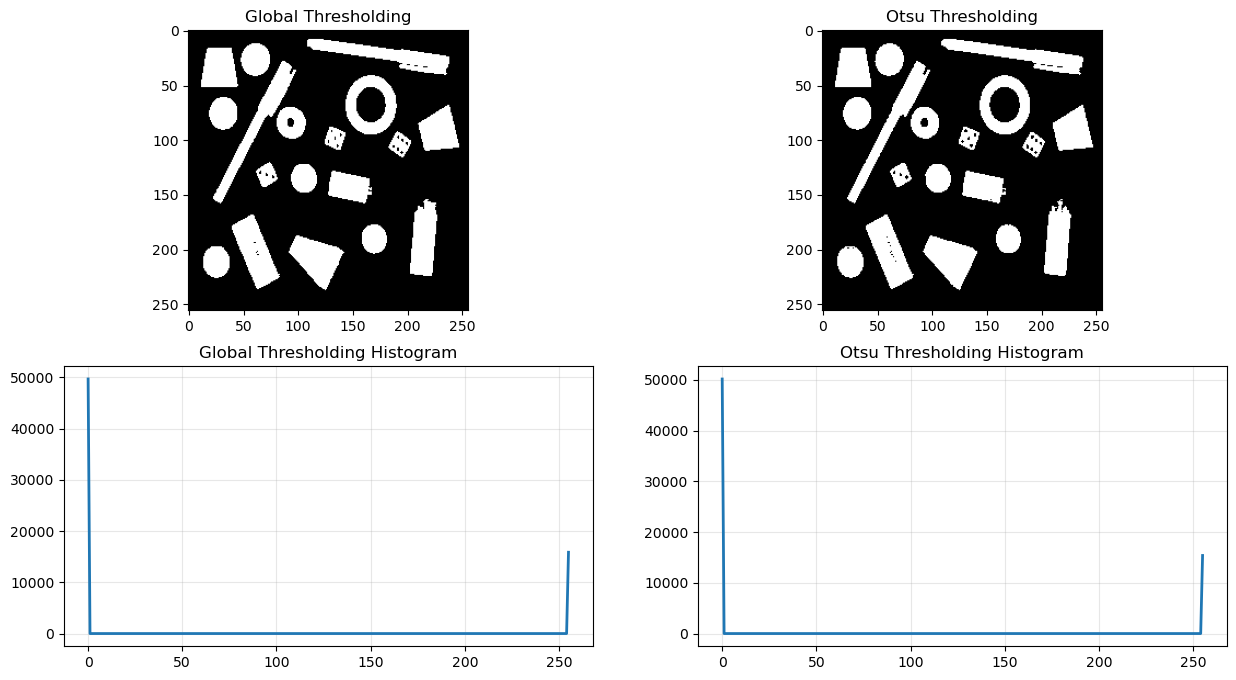

In [ ]:
#Umbralizacion global
thres_value, thres_image = cv2.threshold(objects, 70, 255, cv2.THRESH_BINARY)
thresHistogram = cv2.calcHist([thres_image], [0], None, [256], [0, 256])

#Umbralizacion con Otsu
otsu_value, otsu_image = cv2.threshold(objects, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsuHistogram = cv2.calcHist([otsu_image], [0], None, [256], [0, 256])

#Visualizacion
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
# Imágenes
ax[0, 0].imshow(thres_image, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Global Thresholding")

ax[0, 1].imshow(otsu_image, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Otsu Thresholding")

# Histogramas
ax[1, 0].plot(thresHistogram, linewidth=2)
ax[1, 0].set_title("Global Thresholding Histogram")
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(otsuHistogram, linewidth=2)
ax[1, 1].set_title("Otsu Thresholding Histogram")
ax[1, 1].grid(True, alpha=0.3)

plt.show()


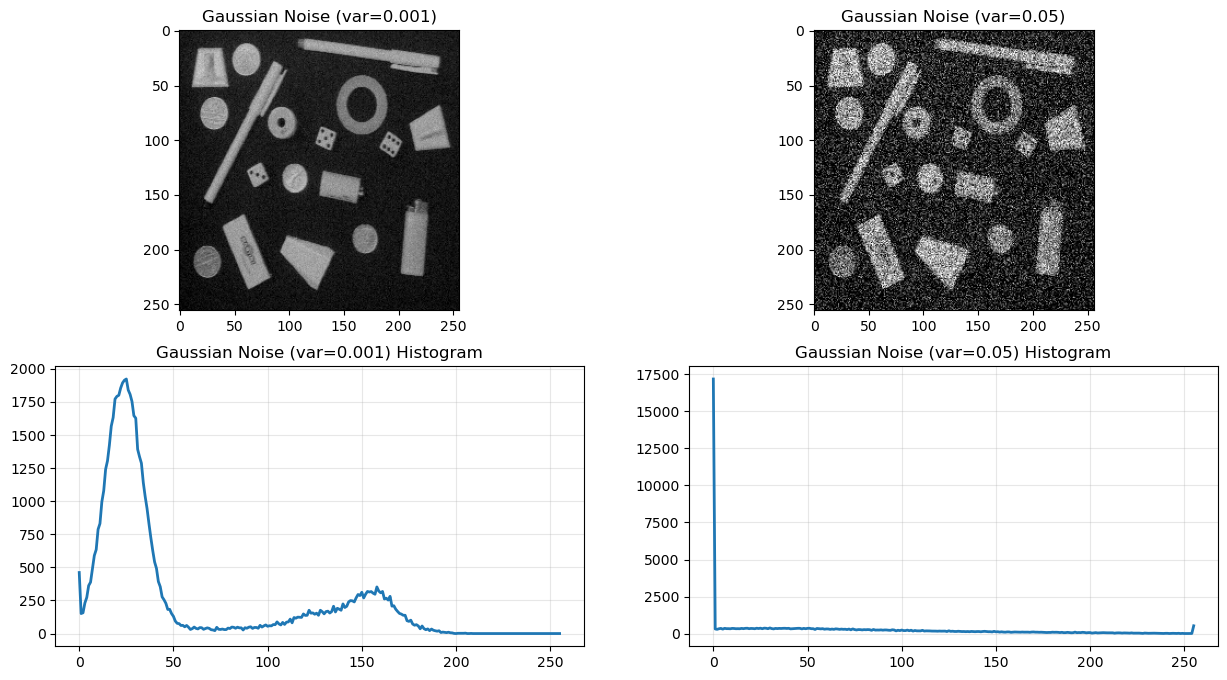

In [29]:
#Introduccion de ruido gaussiano
noised_image01 = random_noise(objects, mode='gaussian', mean=0,  var=0.001) * 255
noised_image01 = noised_image01.astype(np.uint8)
noised1Histogram = cv2.calcHist([noised_image01], [0], None, [256], [0, 256])

noised_image05 = random_noise(objects, mode='gaussian', mean=0,  var=0.05) * 255
noised_image05 = noised_image05.astype(np.uint8)
noise5Histogram = cv2.calcHist([noised_image05], [0], None, [256], [0, 256])

#Visualizacion
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
# Imágenes
ax[0, 0].imshow(noised_image01, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Gaussian Noise (var=0.001)")
ax[0, 1].imshow(noised_image05, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Gaussian Noise (var=0.05)")
# Histogramas
ax[1, 0].plot(noised1Histogram, linewidth=2)
ax[1, 0].set_title("Gaussian Noise (var=0.001) Histogram")
ax[1, 0].grid(True, alpha=0.3)
ax[1, 1].plot(noise5Histogram, linewidth=2)
ax[1, 1].set_title("Gaussian Noise (var=0.05) Histogram")
ax[1, 1].grid(True, alpha=0.3)
plt.show()

**¿Qué sucede?**
La imagen se ve más granulada y con pérdida de nitidez a medida que aumenta la varianza. Con varianza pequeña casi no cambia visualmente, pero con varianza grande aparecen muchos puntos claros y oscuros que dificultan distinguir detalles y hacen que los bordes se vean menos definidos.

**¿Por qué sucede esto?**
Sucede porque el ruido gaussiano modifica los valores originales de intensidad de los píxeles de forma aleatoria. Cuando la varianza es mayor, la magnitud de esas modificaciones también lo es, por lo que la imagen se aleja más de sus valores originales y se altera más su apariencia.

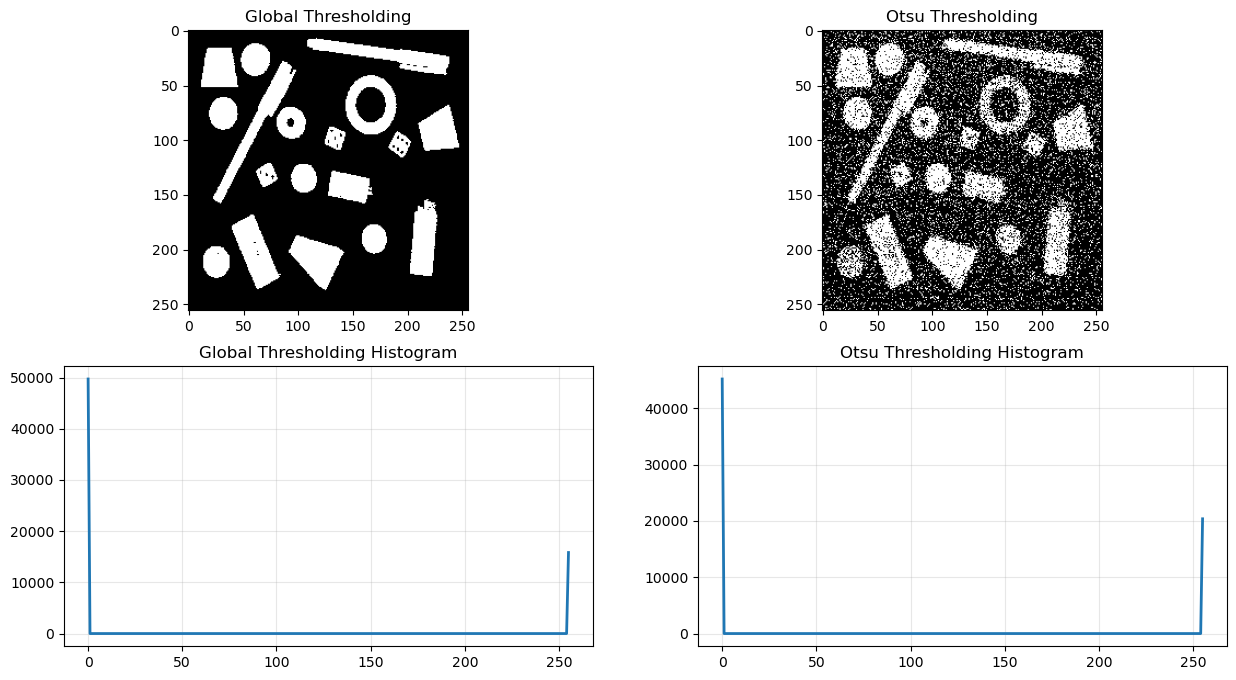

In [30]:
#Umbralizacion global
thres_value, thres_image = cv2.threshold(noised_image01, 70, 255, cv2.THRESH_BINARY)
thresHistogram = cv2.calcHist([thres_image], [0], None, [256], [0, 256])

#Umbralizacion con Otsu
otsu_value, otsu_image = cv2.threshold(noised_image05, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsuHistogram = cv2.calcHist([otsu_image], [0], None, [256], [0, 256])

#Visualizacion
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
# Imágenes
ax[0, 0].imshow(thres_image, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Global Thresholding")

ax[0, 1].imshow(otsu_image, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Otsu Thresholding")

# Histogramas
ax[1, 0].plot(thresHistogram, linewidth=2)
ax[1, 0].set_title("Global Thresholding Histogram")
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(otsuHistogram, linewidth=2)
ax[1, 1].set_title("Otsu Thresholding Histogram")
ax[1, 1].grid(True, alpha=0.3)

plt.show()

**¿Cómo afecta el ruido al resultado?**

Al realizar las umbralizaciones se observa que la imagen con varianza 0.001 prácticamente no presenta cambios visibles ni en su histograma ni en la imagen resultante, ya que el nivel de ruido es bajo y no altera de forma significativa las intensidades originales. En cambio, en la imagen con varianza 0.05 los cambios son evidentes: el ruido permanece en la imagen umbralizada, generando píxeles blancos en zonas que antes eran fondo negro y píxeles negros dentro de las figuras que originalmente eran blancas, lo que distorsiona su forma. Asimismo, el histograma muestra variaciones notables, con una mayor dispersión y presencia de intensidades que antes no predominaban, lo cual está directamente relacionado con la alteración producida por el mayor nivel de ruido.

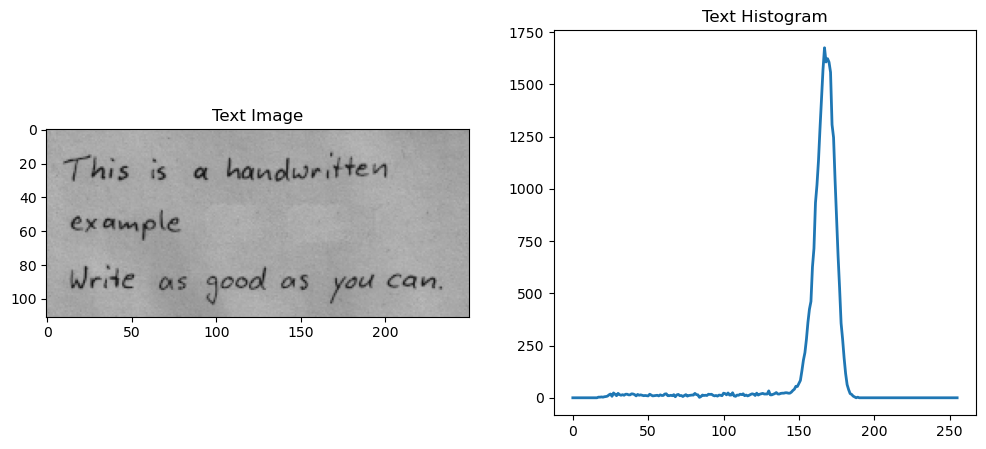

In [31]:
text = cv2.imread("images/TEXT.png", cv2.IMREAD_GRAYSCALE)
textHistogram = cv2.calcHist([text], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(text, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Text Image")
ax[1].plot(textHistogram, linewidth=2)
ax[1].set_title("Text Histogram")
plt.show()

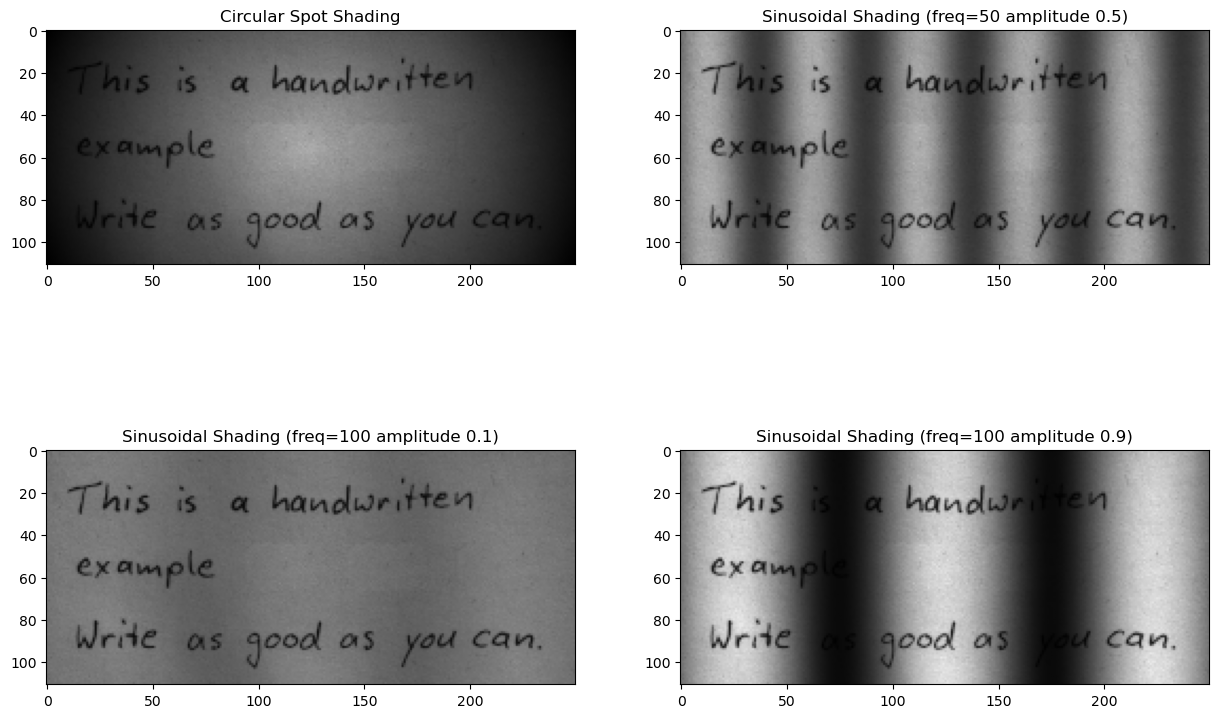

In [44]:
#Introduccion de sombra circular lateral
rows, cols = text.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
#Cálculo del centro
cx, cy = cols // 2, rows // 2  
#Cálculo del radio y distancia posible
distance = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
max_dist = np.sqrt(cx**2 + cy**2) 

#Aplicación del gradiente
spot_shading = 1 - (distance / max_dist)  
spot_image = text * spot_shading
spot_image = spot_image.astype(np.uint8)

#Introduccion de sombra sinusoidal
def sobraSinoidal(image, frequency, amplitude):
    #Cálculo y aplicación del efecto
    sinusoidal_shading = (1 + amplitude * np.sin(2 * np.pi * x / frequency)) / 1.5
    sinusoidal_image = image * sinusoidal_shading

    sinusoidal_image = sinusoidal_image.astype(np.uint8)
    
    return sinusoidal_image

sinusoidal_image50 = sobraSinoidal(text, frequency=50, amplitude=0.5)
sinusoidal_image100 = sobraSinoidal(text, frequency=100, amplitude=0.1)
sinusoidal_image200 = sobraSinoidal(text, frequency=100, amplitude=0.9)

#Visualización de las imágenes con sombras
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(spot_image, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Circular Spot Shading")
ax[0, 1].imshow(sinusoidal_image50, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Sinusoidal Shading (freq=50 amplitude 0.5)")
ax[1, 0].imshow(sinusoidal_image100, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Sinusoidal Shading (freq=100 amplitude 0.1)")
ax[1, 1].imshow(sinusoidal_image200, cmap="gray", vmin=0, vmax=255)
ax[1, 1].set_title("Sinusoidal Shading (freq=100 amplitude 0.9)")
plt.show()

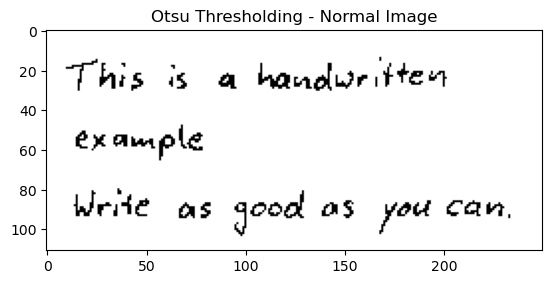

In [47]:
#Aplicación de umbralización con Otsu sobre TEXT
thres_value, thres_image_normal = cv2.threshold(text, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_normal, cmap="gray", vmin=0, vmax=255)
plt.title("Otsu Thresholding - Normal Image")
plt.show()


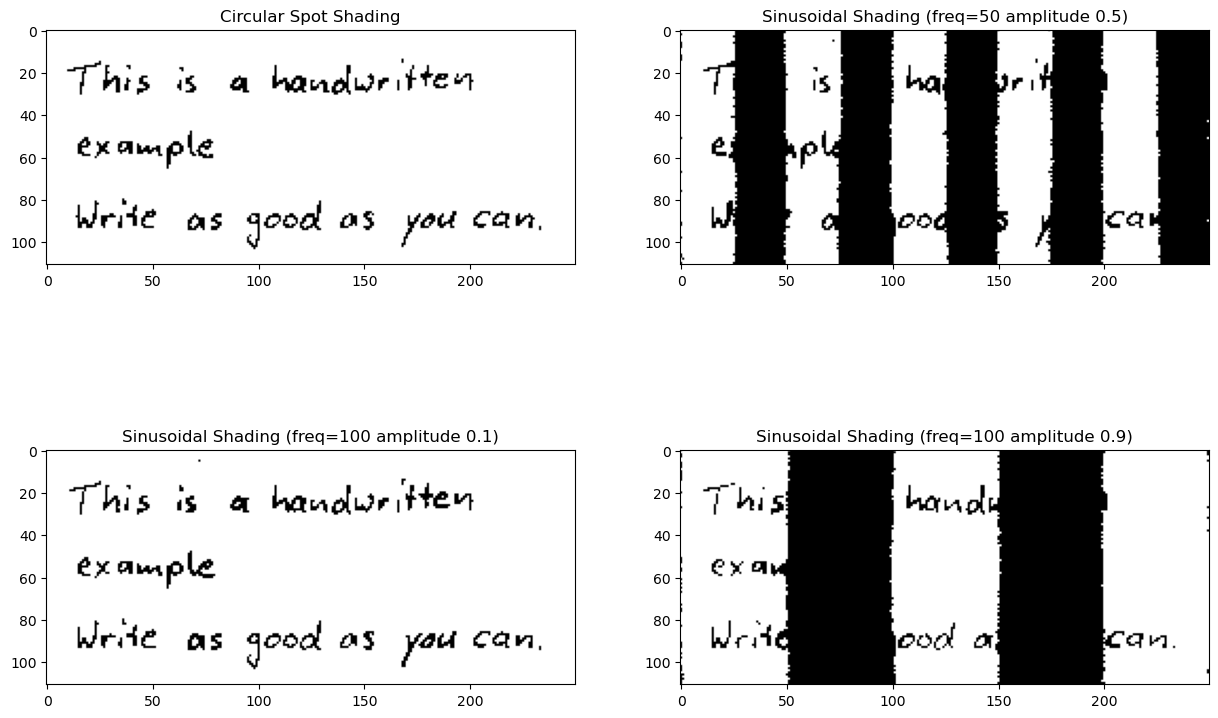

In [48]:
#Aplicación de umbralización con Otsu sobre las imágenes con sombras
thres_value, thres_image_spot = cv2.threshold(spot_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_value, thres_image_sin50 = cv2.threshold(sinusoidal_image50, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_value, thres_image_sin100 = cv2.threshold(sinusoidal_image100, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thres_value, thres_image_sin200 = cv2.threshold(sinusoidal_image200, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Visualización de las imágenes con sombras
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(thres_image_normal, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("Circular Spot Shading")
ax[0, 1].imshow(thres_image_sin50, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Sinusoidal Shading (freq=50 amplitude 0.5)")
ax[1, 0].imshow(thres_image_sin100, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Sinusoidal Shading (freq=100 amplitude 0.1)")
ax[1, 1].imshow(thres_image_sin200, cmap="gray", vmin=0, vmax=255)
ax[1, 1].set_title("Sinusoidal Shading (freq=100 amplitude 0.9)")
plt.show()

**¿Qué sucede?** 

